Dataset: [Customer Personality Analysis](https://drive.google.com/file/d/19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr/view?usp=sharing)

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
import inflection

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from tqdm.auto import tqdm

nK = 10
SEED = 10

COLOR = '#319DA0'

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')



def load_dataset(path):
    df = pd.read_csv(path)
    return df

# Task 4 - Customer Personality Analysis for Marketing Retargeting

**Tahapan Pengerjaan**
1. Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan
2. Memilih cluster yang akan dilakukan marketing retargetting
3. Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

In [35]:
model = KMeans(n_clusters=4, random_state=SEED)
result = model.fit(X.values)
X['cluster'] = model.labels_
X.insert(0, 'cluster', X.pop('cluster'))
df_sum['cluster'] = model.labels_
df_sum.insert(0, 'cluster', df_sum.pop('cluster'))

In [36]:
X.head()

,cluster,age,income,kidhome,teenhome,recency,mnt_coke,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,join_at_age,total_children,is_parents,total_spent,total_accepted_camp,total_transaction,cvr
0,2,0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,0.897752,-1.264803,0,1.675488,0,25,3.571429
1,1,1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,1.313688,1.405806,1,-0.962358,0,6,1.200000
2,2,0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0.315443,-1.264803,0,0.280250,0,21,5.250000
3,1,-1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,-1.181925,0.070501,1,-0.919224,0,8,1.333333
4,3,-1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,-0.932363,0.070501,1,-0.307044,0,19,3.800000


In [37]:
X['cluster'].value_counts()

1    930
3    607
2    542
0    137
Name: cluster, dtype: int64

In [42]:
df_sum.head()

,cluster,id,year_birth,age,map_age,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_coke,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response,join_at_age,total_children,is_parents,total_spent,total_accepted_camp,total_transaction,cvr
0,2,5524,1957,65,5,3,6,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1617000,0,25,3.571429
1,1,2174,1954,68,5,3,6,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1,27000,0,6,1.200000
2,2,4141,1965,57,5,3,6,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,776000,0,21,5.250000
3,1,6182,1984,38,4,3,6,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,1,53000,0,8,1.333333
4,3,5324,1981,41,4,5,6,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,1,422000,0,19,3.800000


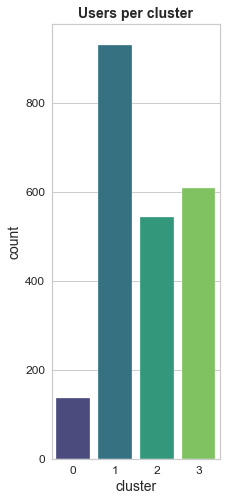

In [39]:
plt.figure(figsize=(3, 8))
sns.countplot(x=X['cluster'], palette='viridis')
plt.title('Users per cluster', fontweight='bold')
plt.show()

In [62]:
# helper function: medians and modes for each cluster
def cluster_profile(df):
    dfc = df.groupby('cluster').agg({
        'age': 'mean',
        'income': 'median',
        'num_deals_purchases': 'sum',
        'total_transaction': 'sum',
        'total_spent': 'median',
        'cvr': 'mean',
        'is_parents': lambda x: x.value_counts().index[0]
                                    })

    return dfc

In [63]:
cluster_profile(df_sum).T.round(1)

cluster,0,1,2,3
age,55.3,50.6,55.4,54.7
income,80124000.0,33516500.0,68130000.0,57906000.0
num_deals_purchases,140.0,1689.0,1598.0,1722.0
total_transaction,2661.0,6683.0,13384.0,10248.0
total_spent,1216000.0,58000.0,1116000.0,527000.0
cvr,19.4,1.3,6.4,4.0
is_parents,0.0,1.0,1.0,1.0


In [61]:
map_cluster = {
    0 : 'High Spender',
    1 : 'Risk of Churn',
    2 : 'Middle Spender',
    3 : 'Low Spender'
}

df_sum['cluster_mapped'] = df_sum['cluster'].map(map_cluster)

Text(0.5, 1.0, 'Total Income per Cluster')

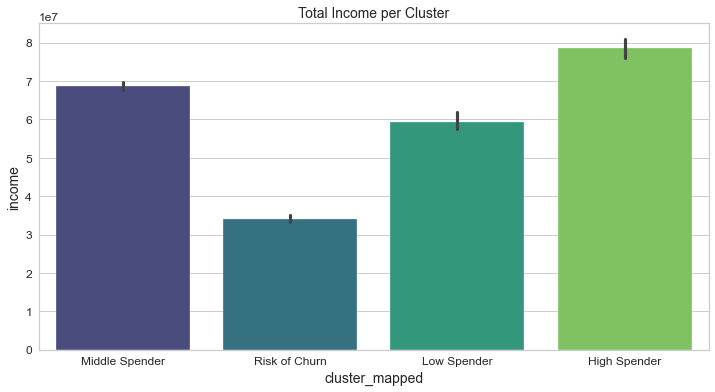

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_sum['cluster_mapped'], y=df_sum['income'], palette='viridis')
plt.title('Total Income per Cluster')

Text(0.5, 1.0, 'Conversion Rate per Cluster')

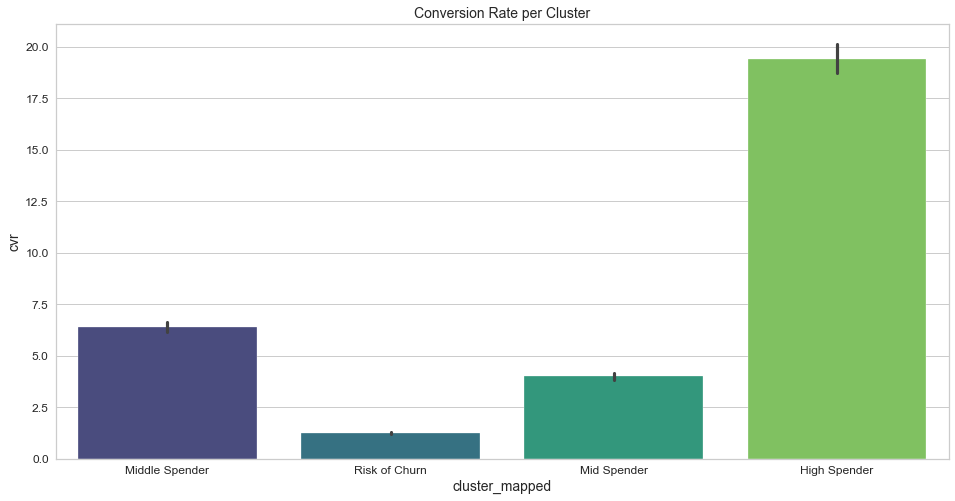

In [56]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df_sum['cluster_mapped'], y=df_sum['cvr'], palette='viridis')
plt.title('Conversion Rate per Cluster')

Text(0.5, 1.0, 'Total Deals Purchases per Cluster')

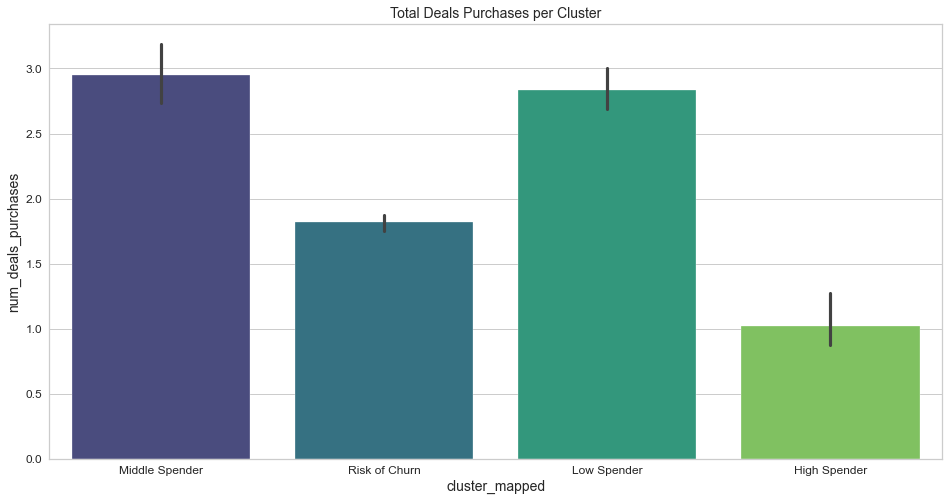

In [66]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df_sum['cluster_mapped'], y=df_sum['num_deals_purchases'], palette='viridis')
plt.title('Total Deals Purchases per Cluster')

Text(0.5, 1.0, 'Total Spent per Cluster')

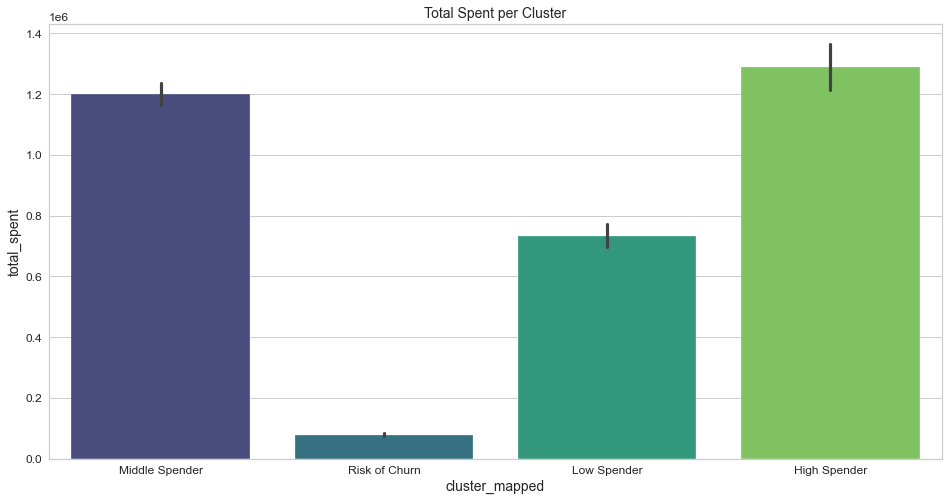

In [68]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df_sum['cluster_mapped'], y=df_sum['total_spent'], palette='viridis')
plt.title('Total Spent per Cluster')

**INSIGHT**

**Low Spender**
- This group is dominated by parents with their average age being 54,7
- this group has the second smallest income and expenses

**Risk of Churn**
- This group is dominated by parents with their average age being 50,6
- This group also has the smallest income among other groups

**Middle Spender**
- This group is dominated by parents with their average age being 55,4
- This group also has the second highest expenditure after the high spender group

**High Spender**
- This group is dominated by parents with their average age being 55,3
- This group has highest income among other groups and also has highest conversion rate